## LSTM02 - Generate next state from previous 10 states



## Preparing data

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb
from scipy.io import arff
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

from scipy.io import arff
import pandas as pd

normal_path = 'EEG_Eye_State.arff'
drive_path = '/content/drive/My Drive/EEG_Eye_State.arff';
## Loading the dataset
# dataset = arff.loadarff(drive_path)
dataset = arff.loadarff(normal_path)
EEGData = pd.DataFrame(dataset[0])



EEGData.head()
# veryfy columns
print(EEGData.info())


data_arr = np.array(EEGData)


Using TensorFlow backend.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3             14980 non-null float64
F7              14980 non-null float64
F3              14980 non-null float64
FC5             14980 non-null float64
T7              14980 non-null float64
P7              14980 non-null float64
O1              14980 non-null float64
O2              14980 non-null float64
P8              14980 non-null float64
T8              14980 non-null float64
FC6             14980 non-null float64
F4              14980 non-null float64
F8              14980 non-null float64
AF4             14980 non-null float64
eyeDetection    14980 non-null object
dtypes: float64(14), object(1)
memory usage: 1.7+ MB
None


## Pre-process Data ( Removing Empty Values / Normalizing / Reshaping )

In [2]:
# preprocesss data | remove empty values
EEGData = EEGData.replace('[?]', np.nan, regex=True)
EEGData = EEGData.dropna()

x_data = np.array(data_arr[:, 0:14],dtype='float64')
Data= [[(x_data[i+j])/float(len(x_data)) for i in range(10)] for j in range(len(EEGData)-10)] 
# removed array index out of bounds ln()-10 
# and /100 for normalization
x_data = np.array(Data)

#need 10 values predicted so we need (_, 10) kinda output
y_data =np.array(data_arr[:, 14],dtype='int')
Target= [[ (y_data[k])/float(len(y_data)) for k in range(10)] for l in range(len(EEGData)-10)]
# removed array index out of bounds ln()-10 
# and /100 for normalization
y_data =  np.array(Target)

y_data = y_data[:len(x_data)]
y_data = y_data.reshape(len(y_data),10)
print(x_data.shape)
print(y_data.shape)

(14970, 10, 14)
(14970, 10)


## Prcoessing Data (Splitting into sub-sequences)

In [3]:

# process the data

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11976, 10, 14)
(2994, 10, 14)
(11976, 10)
(2994, 10)


## Creating the LSTM model

In [6]:
!pip instal pydot
model = Sequential()
model.add(LSTM(10, batch_input_shape=(None,10, 14), return_sequences=False))
## in here the dence layer should be different since 10 next actions are needed to be predicted
model.add(Dense(y_data.shape[1], activation='relu'))
model.compile(loss='mean_absolute_error',
              optimizer='adam', metrics=['accuracy'])
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Traceback (most recent call last):
  File "/usr/bin/pip", line 9, in <module>
    from pip import main
ImportError: cannot import name main
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                1000      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 1,110
Trainable params: 1,110
Non-trainable params: 0
_________________________________________________________________


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

## Train the model


In [7]:
# train the model
history = model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))


Train on 11976 samples, validate on 2994 samples
Epoch 1/50
11976/11976 [==============================] - 3s 219us/step - loss: 0.0016 - acc: 0.9316 - val_loss: 1.2729e-05 - val_acc: 0.9987
Epoch 2/50
11976/11976 [==============================] - 2s 180us/step - loss: 2.6132e-05 - acc: 0.9990 - val_loss: 1.1030e-05 - val_acc: 0.9980
Epoch 3/50
11976/11976 [==============================] - 2s 179us/step - loss: 1.6383e-05 - acc: 0.9988 - val_loss: 5.2045e-06 - val_acc: 0.9990
Epoch 4/50
11976/11976 [==============================] - 2s 176us/step - loss: 1.5074e-05 - acc: 0.9991 - val_loss: 3.8385e-06 - val_acc: 0.9993
Epoch 5/50
11976/11976 [==============================] - 2s 178us/step - loss: 1.2507e-05 - acc: 0.9994 - val_loss: 2.4250e-06 - val_acc: 0.9993
Epoch 6/50
11976/11976 [==============================] - 2s 191us/step - loss: 9.5647e-06 - acc: 0.9996 - val_loss: 1.5962e-06 - val_acc: 0.9993
Epoch 7/50
11976/11976 [==============================] - 2s 194us/step - loss:

## Predict Results

In [8]:

print(history.history.get('acc')[-1])

results = model.predict(x_test, verbose=1)
print(results.shape)

# for index, y_val in enumerate(y_test):
  
#   print("Actual: "+ y_data+" vs Predicted:"+str(results[index]));
  

1.0
2994/2994 [==============================] - 0s 75us/step
(2994, 10)


## Analyze model

29940
29940


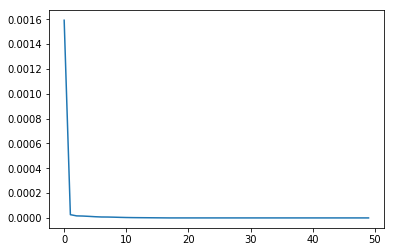

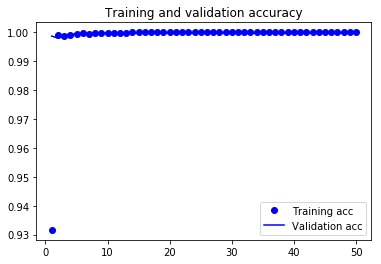

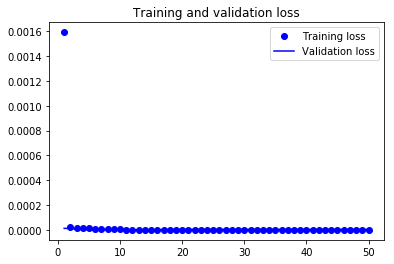

In [10]:
import matplotlib.pyplot as plt

print(results.size)
print(y_test.size)


plt.plot(history.history['loss'])
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

